# Inferential Statistics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli

# seaborn configuration
sns.set(color_codes=True)
sns.set(rc={"figure.figsize": (5, 5)})

In [2]:
print("Seaborn version:", sns.__version__)

Seaborn version: 0.11.0


In [3]:
def plot_distribution(data, title):
    ax = sns.displot(
        data,
        bins=100,
        kde=True,
        color="skyblue",
        linewidth=15,
        alpha=1
    )
    ax.set(xlabel=title, ylabel="Frequency")
    plt.title(title)
    plt.show()

## Uniform Distribution

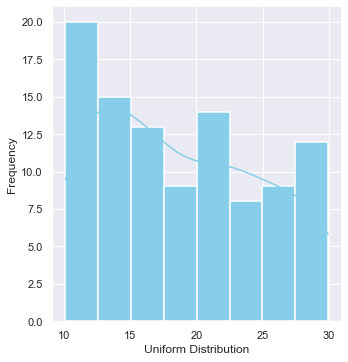

In [4]:
n = 100
loc = 10
scale = 20
rv_uniform = uniform.rvs(loc=loc, scale=scale, size=n)

# plot distribution
ax = sns.displot(rv_uniform, color="skyblue", linewidth=1.5, alpha=1, kde=True)
ax.set(xlabel="Uniform Distribution", ylabel="Frequency")
plt.show()

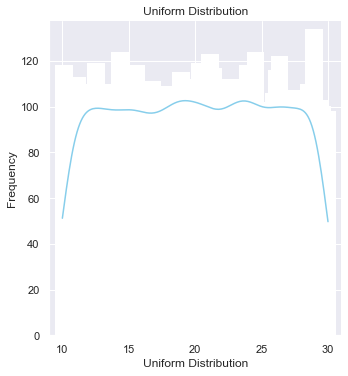

In [5]:
n = 10000
loc = 10
scale = 20
rv_uniform = uniform.rvs(loc=loc, scale=scale, size=n)

# plot distribution
ax = sns.displot(rv_uniform, color="skyblue", linewidth=15, alpha=1, kde=True, bins=100)    # seaborn>0.11
# ax = sns.distplot(rv_uniform, color="skyblue", hist_kws={"linewidth": 15, "alpha": 1}, kde=True, bins=100)    # seaborn<0.11
ax.set(xlabel="Uniform Distribution", ylabel="Frequency")
plt.title("Uniform Distribution")
plt.show()

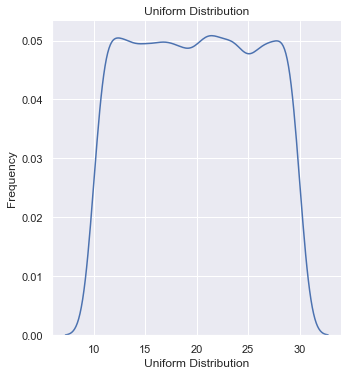

In [6]:
n = 10000
loc = 10
scale = 20
rv_uniform = uniform.rvs(loc=loc, scale=scale, size=n)

# plot distribution
ax = sns.displot(rv_uniform, kind="kde")
ax.set(xlabel="Uniform Distribution", ylabel="Frequency")
plt.title("Uniform Distribution")
plt.show()

## Normal Distribution

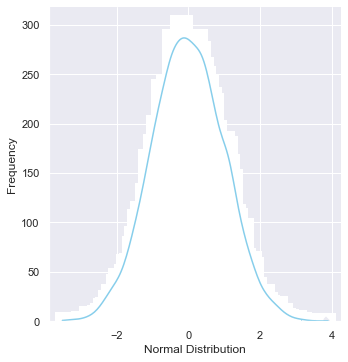

In [7]:
n = 10000
loc = 0
scale = 1
rv_normal = norm.rvs(loc=loc, scale=scale, size=n)

ax = sns.displot(
    rv_normal,
    bins=100,
    kde=True,
    color="skyblue",
    linewidth=15,
    alpha=1
)
ax.set(xlabel="Normal Distribution", ylabel="Frequency")
plt.show()

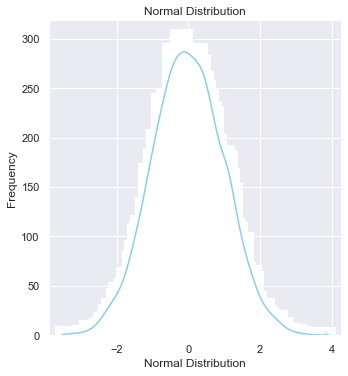

In [8]:
plot_distribution(rv_normal, "Normal Distribution")

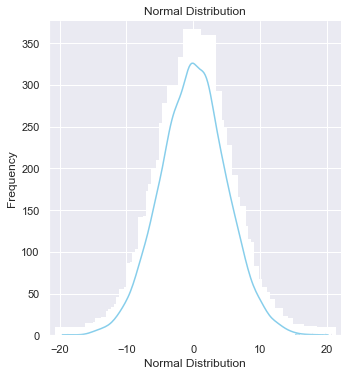

In [9]:
plot_distribution(
    norm.rvs(loc=0, scale=5, size=10000),
    "Normal Distribution"
)

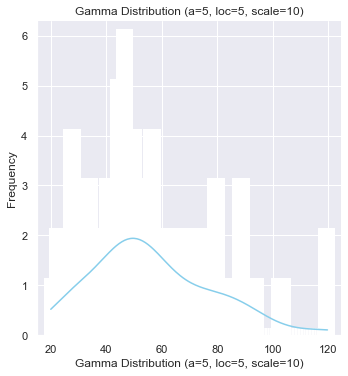

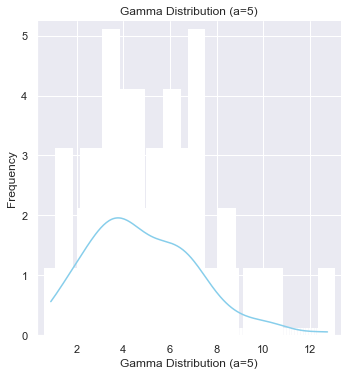

In [10]:
n = 100
a = 5
loc = 5
scale = 10
rv_gamma = gamma.rvs(a=a, loc=loc, scale=scale, size=n)
plot_distribution(rv_gamma, f"Gamma Distribution (a={a}, loc={loc}, scale={scale})")

n = 100
a = 5
rv_gamma = gamma.rvs(a=a, size=n)
plot_distribution(rv_gamma, f"Gamma Distribution (a={a})")

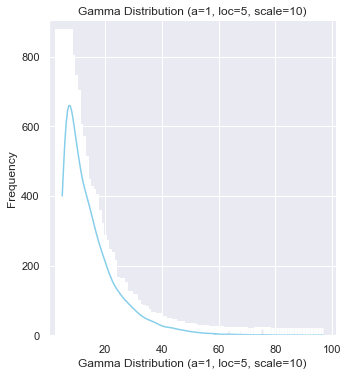

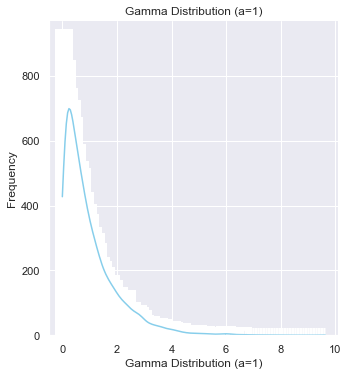

In [11]:
n = 10000
a = 1
loc = 5
scale = 10
rv_gamma = gamma.rvs(a=a, loc=loc, scale=scale, size=n)
plot_distribution(rv_gamma, f"Gamma Distribution (a={a}, loc={loc}, scale={scale})")

n = 10000
a = 1
rv_gamma = gamma.rvs(a=a, size=n)
plot_distribution(rv_gamma, f"Gamma Distribution (a={a})")

## Exponential Distribution

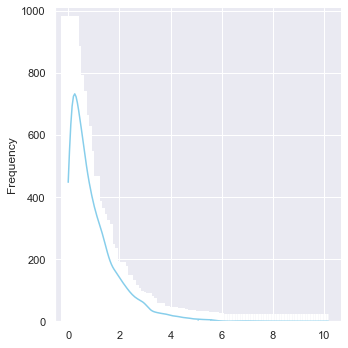

In [12]:
n = 10000
loc = 0
scale = 1
rv_exponential = expon.rvs(scale=scale, loc=loc, size=n)
plot_distribution(rv_exponential, "")

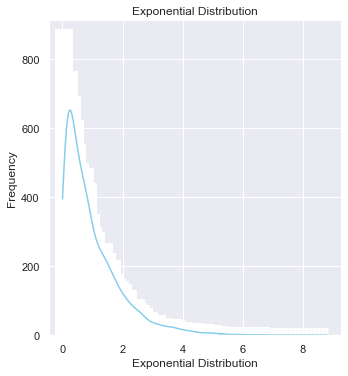

In [13]:
n = 10000
loc = 0
scale = 1
rv_exponential = expon.rvs(scale=scale, loc=loc, size=n)
plot_distribution(rv_exponential, "Exponential Distribution")

## Poisson Distribution

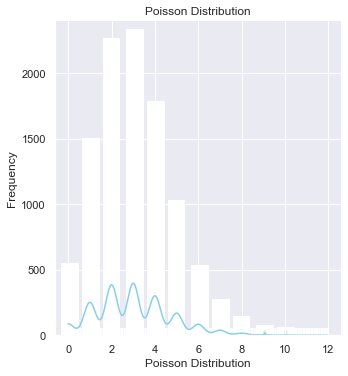

In [14]:
size = 10000
mu = 3
rv_poisson = poisson.rvs(mu=mu, size=size)
plot_distribution(rv_poisson, "Poisson Distribution")

## Binomial Distribution

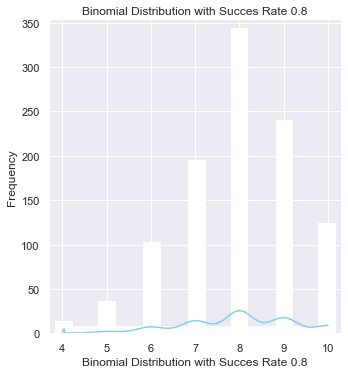

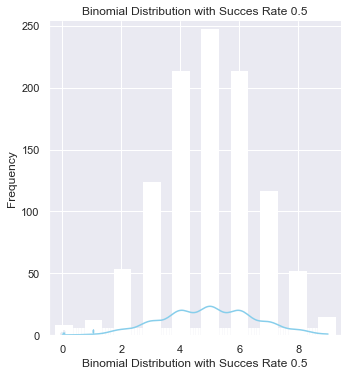

In [15]:
size = 1000
n = 10
p = .8
rv_binomial = binom.rvs(n=n, p=p, size=size)
plot_distribution(rv_binomial, f"Binomial Distribution with Succes Rate {p}")

size = 1000
n = 10
p = .5
rv_binomial = binom.rvs(n=n, p=p, size=size)
plot_distribution(rv_binomial, f"Binomial Distribution with Succes Rate {p}")

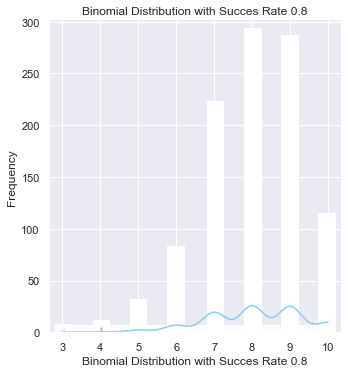

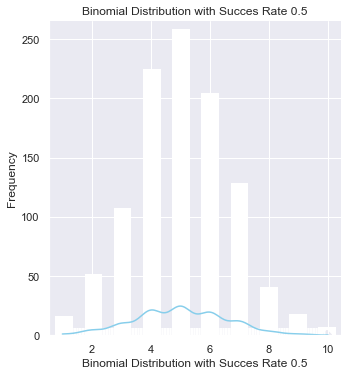

In [16]:
size = 1000
n = 10
p = .8
rv_binomial = np.random.binomial(n, p, size)
plot_distribution(rv_binomial, f"Binomial Distribution with Succes Rate {p}")

size = 1000
n = 10
p = .5
rv_binomial = np.random.binomial(n, p, size)
plot_distribution(rv_binomial, f"Binomial Distribution with Succes Rate {p}")

## Bernoulli Distribution

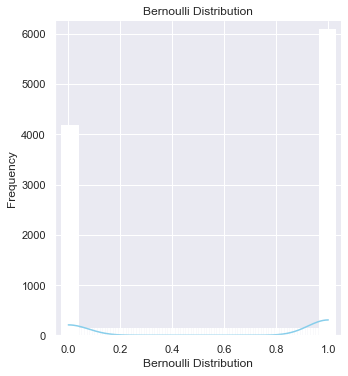

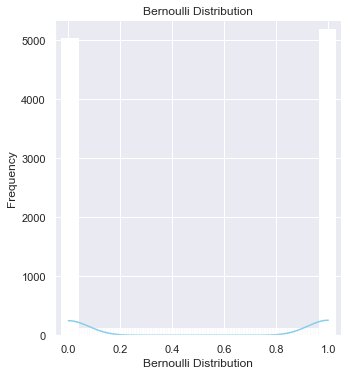

In [17]:
size = 10000
p = .6
rv_bernoulli = bernoulli.rvs(size=size, p=p)
plot_distribution(rv_bernoulli, "Bernoulli Distribution")

size = 10000
p = .5
rv_bernoulli = bernoulli.rvs(size=size, p=p)
plot_distribution(rv_bernoulli, "Bernoulli Distribution")

In [18]:
np.random.seed(111)
np.random.normal(loc=0, scale=1, size=10)

array([-1.13383833,  0.38431919,  1.49655378, -0.3553823 , -0.78753354,
       -0.45943891, -0.05916877, -0.3541735 , -0.73552305, -1.18393989])

In [19]:
rng = np.random.default_rng(111)    # using default random number generator
rng.normal(loc=0, scale=1, size=10)

array([-0.30743784, -0.8386569 ,  0.12563787, -0.66067729,  0.15831516,
        2.43876182,  0.43963253,  0.77035284, -0.79443326, -0.90645504])

## Confidence Interval

In [20]:
heart = pd.read_csv("data/heart.csv")
print("Dataset shape:", heart.shape)
display(heart.head())

Dataset shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
heart["sex"] = heart.sex.replace({1: "Male", 0: "Female"})
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [22]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [23]:
heart.sex.value_counts()

Male      713
Female    312
Name: sex, dtype: int64

### CI for Proportion

In [24]:
cross_tab = pd.crosstab(heart.target, heart.sex)

In [25]:
cross_tab["Total"] = cross_tab["Female"] + cross_tab["Male"]
cross_tab

sex,Female,Male,Total
target,,,
0,86,413,499
1,226,300,526


In [26]:
pop_female = 312
pop_male = 713

prop_female = 226 / pop_female
print("Proportion of female having disease:", prop_female)

Proportion of female having disease: 0.7243589743589743


In [27]:
stderr_female = np.sqrt(prop_female * (1-prop_female) / pop_female)
print("Standard error for female proportion:", stderr_female)

Standard error for female proportion: 0.02529714756803247


In [28]:
def compute_CI(estimate, stderr, z_score=1.96):
    return (
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )

In [29]:
lower_ci, upper_ci = compute_CI(prop_female, stderr_female)
print(f"CI for female proportion having disease: [{lower_ci:.3f}, {upper_ci:.3f}]")

CI for female proportion having disease: [0.675, 0.774]


In [30]:
lower_CI, upper_CI = sm.stats.proportion_confint(pop_female * prop_female, pop_female)
print(f"CI for female proportion having disease: [{lower_CI:.3f}, {upper_CI:.3f}]")

CI for female proportion having disease: [0.675, 0.774]


### CI for Mean

In [31]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [32]:
heart.groupby("sex").aggregate({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
sex                               
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [33]:
mean_female_chol = 261.455
std_female_chol = 64.467
n_female = 312
z = 1.96

stderr_mean_female = std_female_chol / np.sqrt(n_female)
print("Standard error mean of female chol:", stderr_mean_female)

Standard error mean of female chol: 3.6497251780099824


In [34]:
lower_ci, upper_ci = compute_CI(mean_female_chol, stderr_mean_female)
print(f"CI for female proportion having disease: [{lower_ci:.3f}, {upper_ci:.3f}]")

CI for female proportion having disease: [254.302, 268.608]


## Hypothesis Testing

In [35]:
n = 1018
pnull = .52
phat = .56

In [36]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative="larger")

(2.571067795759113, 0.005069273865860533)

In [37]:
nhanes = pd.read_csv("data/nhanes_2015_2016.csv")
nhanes

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [38]:
nhanes_female = nhanes[nhanes["RIAGENDR"] == 2]
nhanes_male = nhanes[nhanes["RIAGENDR"] == 1]

# num of observatioon
num_female = len(nhanes_female)
num_male = len(nhanes_male)

# mean
mu_female = nhanes_female.BMXBMI.mean()
mu_male = nhanes_male.BMXBMI.mean()

# std
std_female = nhanes_female.BMXBMI.std()
std_male = nhanes_male.BMXBMI.std()

In [39]:
sm.stats.ztest(nhanes_female.BMXBMI.dropna(), nhanes_male.BMXBMI.dropna(), alternative="two-sided")

(6.1755933531383205, 6.591544431126401e-10)